# Goal

* Use validation dataset to test the power of HR-SIP with multiple 'heavy' BD windows
  * global adjustment of all hypotheses for all windows
  * using 2-4 windows and assessing the power

# Setting variables

In [5]:
workDir = '/home/nick/notebook/SIPSim/dev/bac_genome1147/validation/multiWindow_HRSIP/'
genomeDir = '/var/seq_data/ncbi_db/genome/Jan2016/bac_complete_spec-rep1_rn/'
figureDir = '/home/nick/notebook/SIPSim/figures/bac_genome_n1147/'

# OTU_abs{abs}_PCR_sub.physeq

# Init

In [7]:
import glob
import nestly
import os
%load_ext rpy2.ipython
%load_ext pushnote

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The pushnote extension is already loaded. To reload it, use:
  %reload_ext pushnote


In [3]:
%%R
library(ggplot2)
library(dplyr)
library(tidyr)
library(gridExtra)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [6]:
if not os.path.isdir(workDir):
    os.makedirs(workDir)
        
%cd $workDir    

/home/nick/notebook/SIPSim/dev/bac_genome1147/validation/multiWindow_HRSIP


# HR-SIP with multiple windows

In [26]:
def HRSIP_multi_window(physeq, BD_shift, BDs, outname, padj=0.1, log2=0.25):
    # HR-SIP for each window
    !SIPSim HRSIP --prefix $outname -w $BDs $physeq 
    # making confusion matrix
    outname2 = outname + '_DESeq2'
    !SIPSimR DESeq2_confuseMtx --padj $padj --log2 $log2 $BD_shift -o $outname $outname2

### 1.70-1.74,1.72-1.76

In [27]:
BDs = '1.70-1.74,1.72-1.76'
physeq = '../OTU_n2_abs1e9_PCR_subNorm.physeq'
BD_shift = '../ampFrags_BD-shift.txt'
HRSIP_multi_window(physeq, BD_shift, BDs, 'OTU_n2_abs1e9_PCR_subNorm_MW1')

HR-SIP on BD window: 1.70-1.74
Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
pre-filter: number of samples:56
pre-filter: number of taxa:1147
post-filter: number of samples:18
post-filter: number of taxa:781
Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 63 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing
HR-SIP on BD window: 1.72-1.76
Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
pre-filter: number of samples:56
pre-filter: number of taxa:1147
post-filter:

### 1.70-1.75,1.72-1.77

In [ ]:
BDs = '1.70-1.75,1.72-1.77'
physeq = '../OTU_n2_abs1e9_PCR_subNorm.physeq'
BD_shift = '../ampFrags_BD-shift.txt'
HRSIP_multi_window(physeq, BD_shift, BDs, 'OTU_n2_abs1e9_PCR_subNorm_MW2')

### 1.70-1.73,1.72-1.75,1.74-1.77

In [ ]:
BDs = '1.70-1.73,1.72-1.75,1.74-1.77'
physeq = '../OTU_n2_abs1e9_PCR_subNorm.physeq'
BD_shift = '../ampFrags_BD-shift.txt'
HRSIP_multi_window(physeq, BD_shift, BDs, 'OTU_n2_abs1e9_PCR_subNorm_MW3')

HR-SIP on BD window: 1.70-1.73
Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
pre-filter: number of samples:56
pre-filter: number of taxa:1147
post-filter: number of samples:14
post-filter: number of taxa:781
Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 13 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing
HR-SIP on BD window: 1.72-1.75
Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
pre-filter: number of samples:56
pre-filter: number of taxa:1147
post-filter:

### 1.70-1.72,1.71-1.73,1.72-1.74,1.73-1.75

In [ ]:
BDs = '1.70-1.72,1.71-1.73,1.72-1.74,1.73-1.75'
physeq = '../OTU_n2_abs1e9_PCR_subNorm.physeq'
BD_shift = '../ampFrags_BD-shift.txt'
HRSIP_multi_window(physeq, BD_shift, BDs, 'OTU_n2_abs1e9_PCR_subNorm_MW4')

HR-SIP on BD window: 1.70-1.72
Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
pre-filter: number of samples:56
pre-filter: number of taxa:1147
post-filter: number of samples:9
post-filter: number of taxa:781
Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
HR-SIP on BD window: 1.71-1.73
Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
pre-filter: number of samples:56
pre-filter: number of taxa:1147
post-filter: number of samples:10
post-filter: number of taxa:781
Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
converting counts to integer mo

### 1.71-1.75

In [55]:
BDs = '1.71-1.75'
physeq = '../OTU_n2_abs1e9_PCR_subNorm.physeq'
BD_shift = '../ampFrags_BD-shift.txt'
HRSIP_multi_window(physeq, BD_shift, BDs, 'OTU_n2_abs1e9_PCR_subNorm_MW5')

HR-SIP on BD window: 1.71-1.75
Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
pre-filter: number of samples:56
pre-filter: number of taxa:1147
post-filter: number of samples:20
post-filter: number of taxa:781
Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 10 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing
Combining DESeq objects
File written: OTU_n2_abs1e9_PCR_subNorm_MW5_1.71-1.75_DESeq2
Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
Log2Fold cutoff: 0.25
p

### 1.71-1.8

In [56]:
BDs = '1.71-1.8'
physeq = '../OTU_n2_abs1e9_PCR_subNorm.physeq'
BD_shift = '../ampFrags_BD-shift.txt'
HRSIP_multi_window(physeq, BD_shift, BDs, 'OTU_n2_abs1e9_PCR_subNorm_MW6')

HR-SIP on BD window: 1.71-1.8
Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
pre-filter: number of samples:56
pre-filter: number of taxa:1147
post-filter: number of samples:32
post-filter: number of taxa:781
Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 63 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing
Combining DESeq objects
File written: OTU_n2_abs1e9_PCR_subNorm_MW6_1.71-1.8_DESeq2
Warning message:
replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’ 
Log2Fold cutoff: 0.25
pad

# Plotting results

In [57]:
files = ['OTU_n2_abs1e9_PCR_subNorm_MW{}_byClass.txt'.format(i) for i in xrange(1,7)]
files

['OTU_n2_abs1e9_PCR_subNorm_MW1_byClass.txt',
 'OTU_n2_abs1e9_PCR_subNorm_MW2_byClass.txt',
 'OTU_n2_abs1e9_PCR_subNorm_MW3_byClass.txt',
 'OTU_n2_abs1e9_PCR_subNorm_MW4_byClass.txt',
 'OTU_n2_abs1e9_PCR_subNorm_MW5_byClass.txt',
 'OTU_n2_abs1e9_PCR_subNorm_MW6_byClass.txt']

In [84]:
%%R -i files

renames = data.frame(file = c('MW1', 'MW2', 'MW3', 'MW4', 'MW5', 'MW6'),
                     BD_window = c('1.70-1.74,\n1.72-1.76', 
                                   '1.70-1.75,\n1.72-1.77',
                                   '1.70-1.73,\n1.72-1.75,\n1.74-1.77',
                                   '1.70-1.72,\n1.71-1.73,\n1.72-1.74,\n1.73-1.75',
                                   '1.71-1.75', '1.71-1.8'))

df = list()
for(F in files){
    tmp = read.delim(F, sep='\t')
    df[[F]] = tmp
}
df = do.call(rbind, df)
df$file = gsub('.+(MW[0-9]+).+', '\\1', rownames(df))

df = inner_join(df, renames, c('file' = 'file')) 

df %>% head(n=3)

  library      variables    values file             BD_window
1       2    Sensitivity 0.9487179  MW1 1.70-1.74,\n1.72-1.76
2       2    Specificity 1.0000000  MW1 1.70-1.74,\n1.72-1.76
3       2 Pos Pred Value 1.0000000  MW1 1.70-1.74,\n1.72-1.76


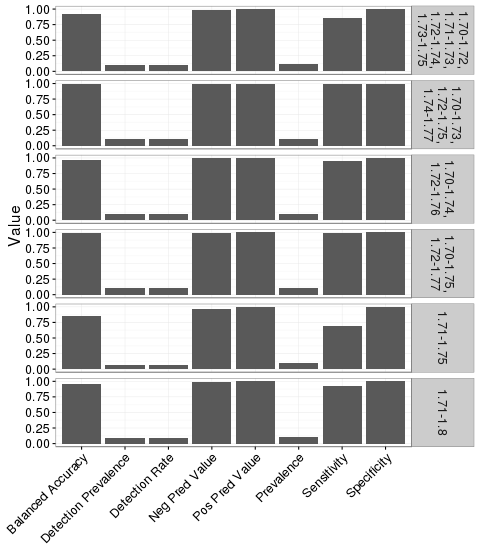

In [62]:
%%R -h 550
ggplot(df, aes(variables, values)) +
    geom_bar(stat='identity') +
    labs(y='Value') +
    facet_grid(BD_window ~ .) +
    theme_bw() +
    theme(
        text = element_text(size=16),
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle=45, hjust=1)
    )

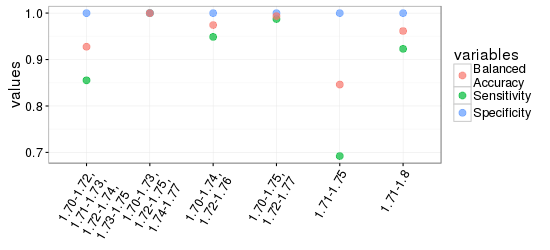

In [83]:
%%R -h 250 -w 550
df.f = df %>%
    filter(variables %in% c('Sensitivity', 'Specificity', 'Balanced Accuracy')) %>%
    mutate(variables = gsub(' ', '\n', variables))

ggplot(df.f, aes(BD_window, values, color=variables)) +
    geom_point(size=3, alpha=0.7) +
    theme_bw() +
    theme(
        text = element_text(size=16),
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle=60, hjust=1)
    )